# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
data = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [90]:
# Your code here
fraud = data.sample(n = 100000)
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2177028,185,CASH_OUT,144681.55,C822412997,0.00,0.00,C261904622,9492907.08,9637588.63,0,0
3989380,298,PAYMENT,54382.73,C111211480,372254.00,317871.27,M1781486559,0.00,0.00,0,0
872778,42,CASH_IN,14612.91,C1342345016,8586782.23,8601395.14,C1090426423,76367.47,61754.56,0,0
49988,9,PAYMENT,5901.99,C2077217337,0.00,0.00,M1488878487,0.00,0.00,0,0
5672763,397,PAYMENT,11091.89,C547639469,0.00,0.00,M323228656,0.00,0.00,0,0


In [91]:
fraud.isFraud.value_counts()

0    99874
1      126
Name: isFraud, dtype: int64

In [50]:
fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

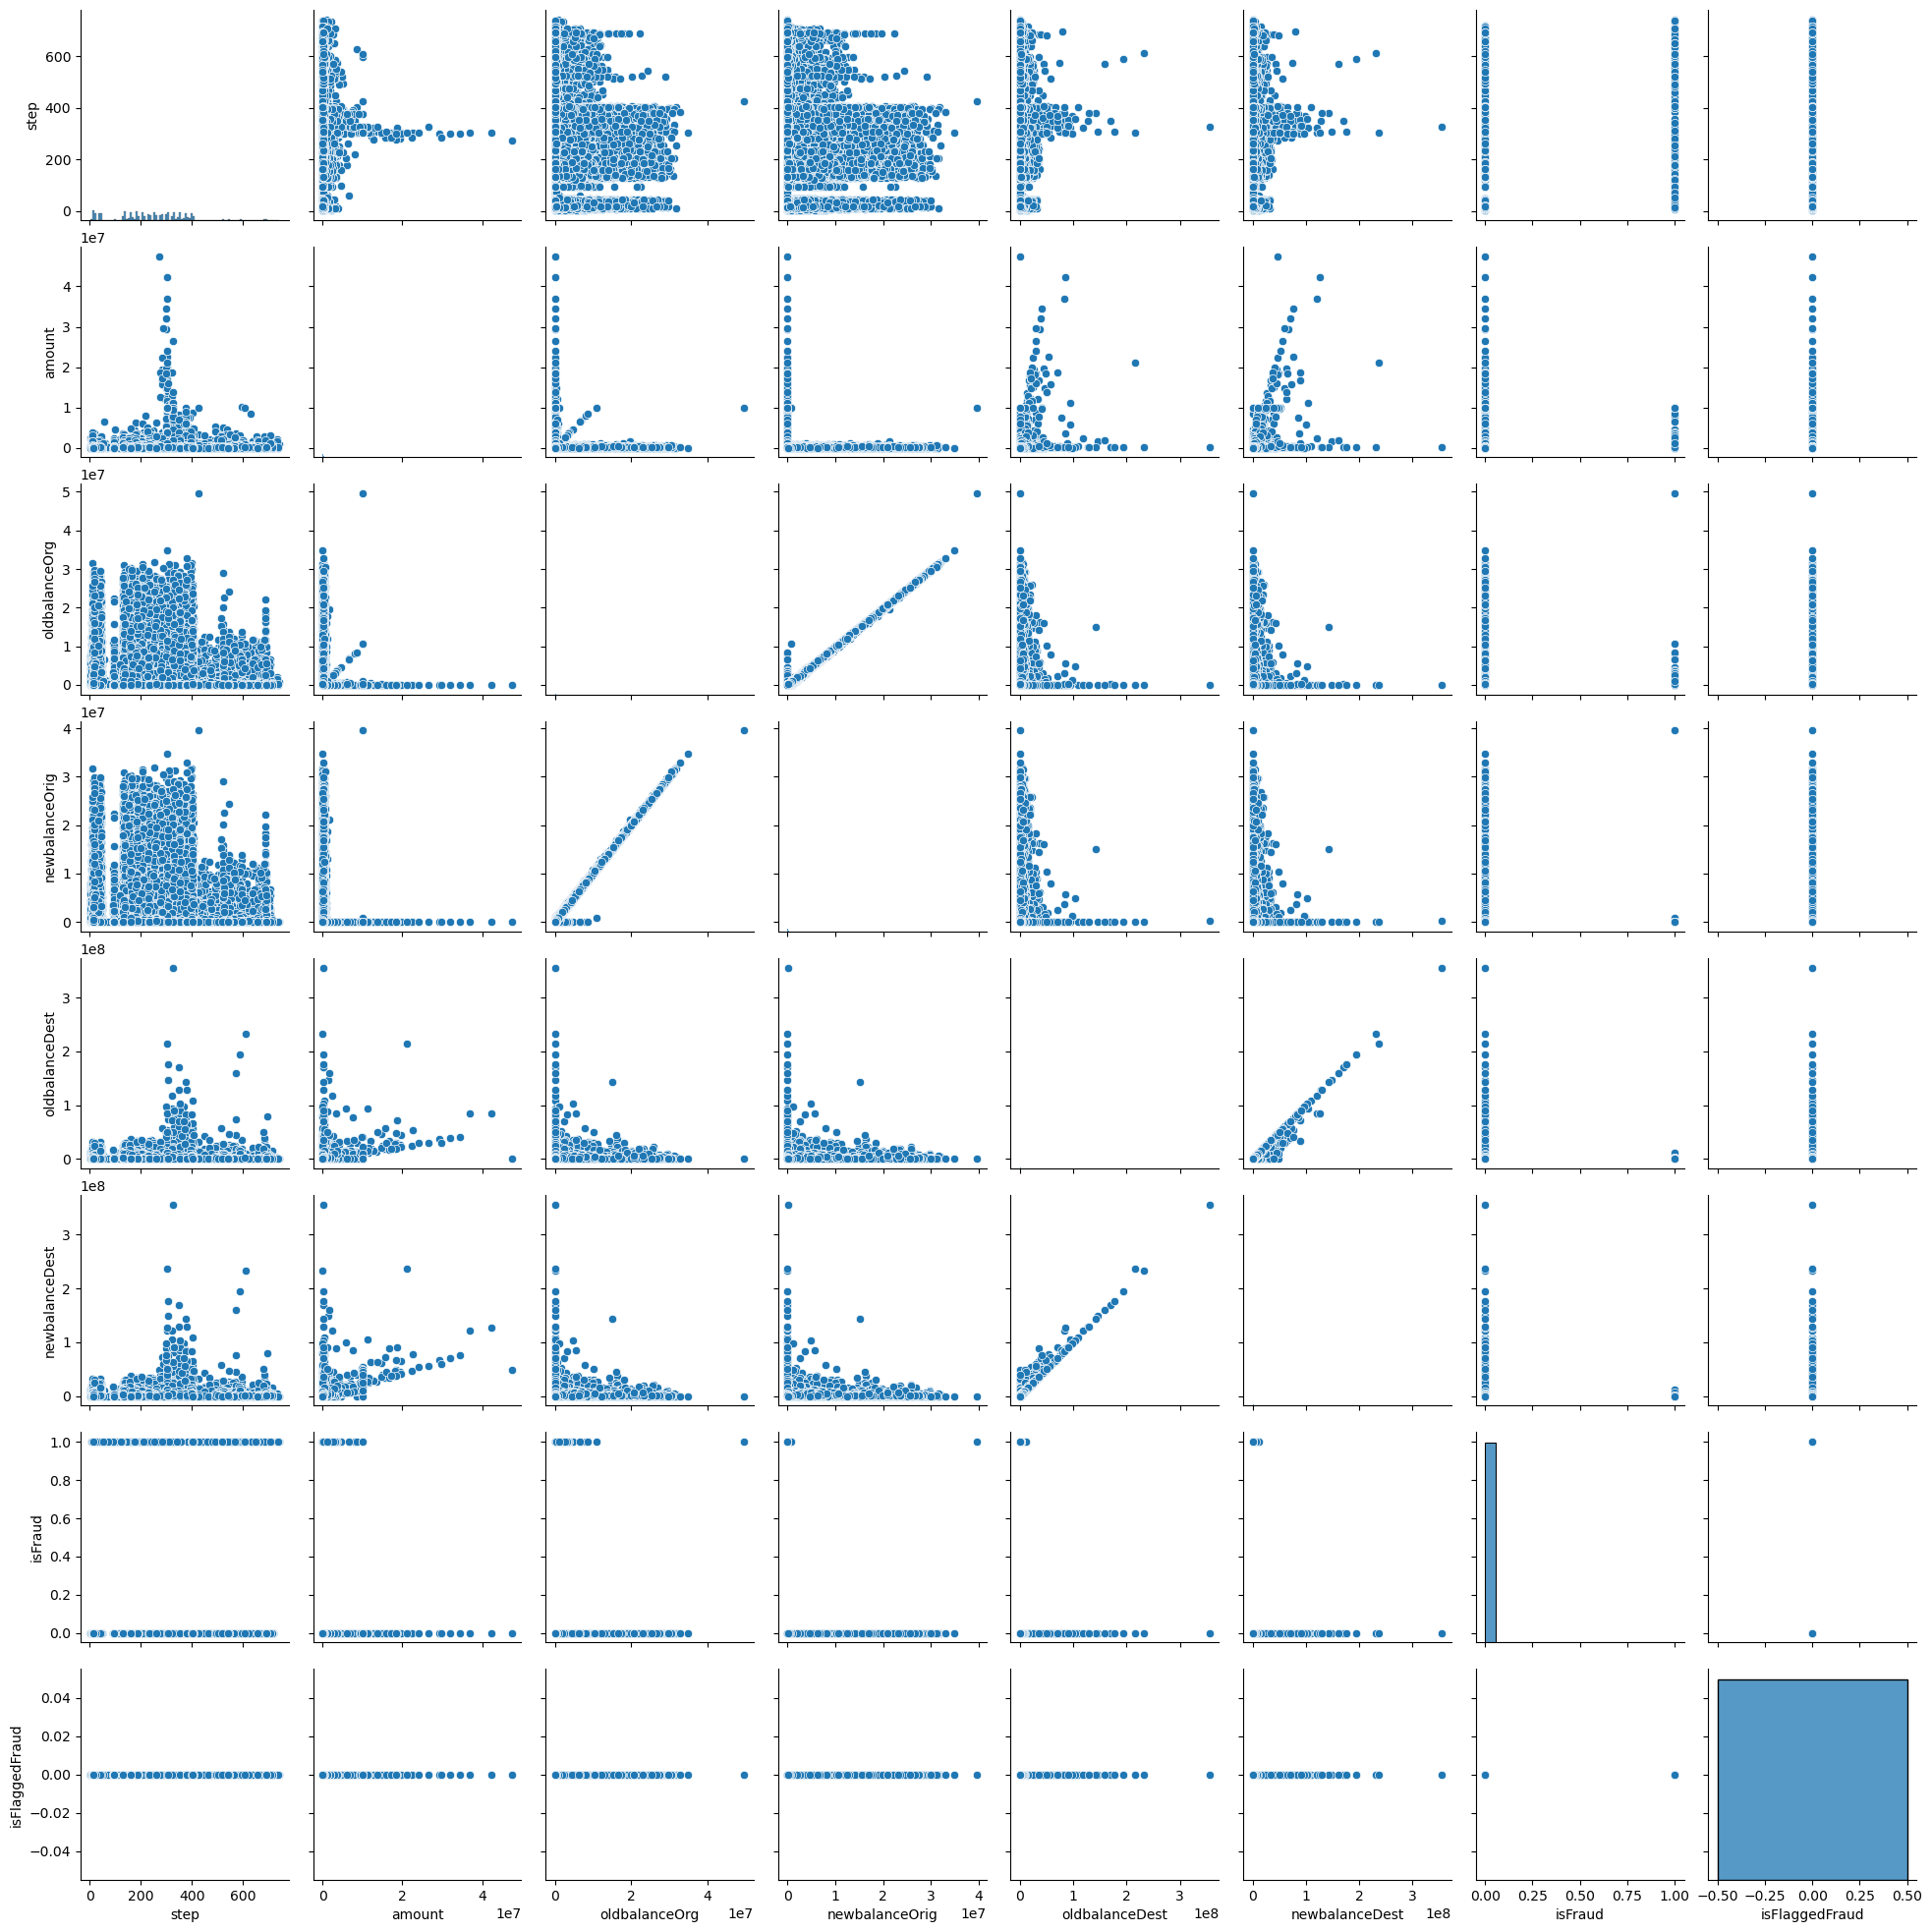

In [51]:
sns.pairplot(data = fraud)
plt.show()

## What is the distribution of the outcome?


0    99874
1      126
Name: isFraud, dtype: int64


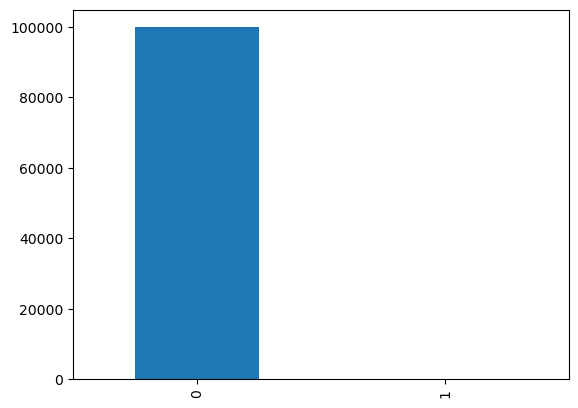

In [92]:
# Your response here
count_fraud = pd.value_counts(fraud['isFraud']) 
print(count_fraud)
count_fraud.plot(kind = 'bar')
plt.show()

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [93]:
# Your code here
type_encode = pd.get_dummies(data = fraud["type"], prefix  ="type")

In [94]:
# Your code here
fraud = fraud.join(type_encode)

In [95]:
fraud = fraud.drop(columns = ["type", "nameOrig","nameDest", "oldbalanceDest", "oldbalanceOrg"])

### Run a logisitc regression classifier and evaluate its accuracy.

In [96]:
# Your code here
fraud.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2177028,185,144681.55,0.00,9637588.63,0,0,0,1,0,0,0
3989380,298,54382.73,317871.27,0.00,0,0,0,0,0,1,0
872778,42,14612.91,8601395.14,61754.56,0,0,1,0,0,0,0
49988,9,5901.99,0.00,0.00,0,0,0,0,0,1,0
5672763,397,11091.89,0.00,0.00,0,0,0,0,0,1,0


### Now pick a model of your choice and evaluate its accuracy.

In [107]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

features = fraud.drop("isFraud", axis = 1)
target = fraud.isFraud

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 0)

LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

# lets check the accuracy of the prediction using precision_score, recall_score, classification_report and  confusion_matrix
pred = LR.predict(X_test)



print(f"Precision score: {precision_score(y_test, pred)}")
print(f"Redcall score: {recall_score(y_test, pred)}")
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

0.99825
0.99835
Precision score: 0.25
Redcall score: 0.1111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19973
           1       0.25      0.11      0.15        27

    accuracy                           1.00     20000
   macro avg       0.62      0.56      0.58     20000
weighted avg       1.00      1.00      1.00     20000



array([[19964,     9],
       [   24,     3]], dtype=int64)

In [98]:
# the data set is imbalanced so it will predict almost all as no fraud. 
# and out of 27 fraud it only detect 3. Lets try to fix this imbalance problem

In [99]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

print(DT.score(X_train, y_train))
print(DT.score(X_test, y_test))

# lets check the accuracy of the prediction using precision_score, recall_score, classification_report and  confusion_matrix
pred = DT.predict(X_test)



print(f"Precision score: {precision_score(y_test, pred)}")
print(f"Redcall score: {recall_score(y_test, pred)}")
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

1.0
0.99915
Precision score: 0.6470588235294118
Redcall score: 0.8148148148148148
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19973
           1       0.65      0.81      0.72        27

    accuracy                           1.00     20000
   macro avg       0.82      0.91      0.86     20000
weighted avg       1.00      1.00      1.00     20000



array([[19961,    12],
       [    5,    22]], dtype=int64)

In [100]:
# Decision Tree works little bit better, out of 27 fraud it can detect correctly 22 cases. 
# However the model still need improvement.

In [101]:
train = pd.concat([X_train, y_train], axis = 1)


no_fraud = train[train["isFraud"] == 0]
yes_fraud = train[train["isFraud"] == 1]

In [106]:
# over sampling
yes_fraud_over = resample(yes_fraud,  # oversample from here
                                    replace = True,  # we need replacement since we dont have enough datapoints
                                    n_samples = len(no_fraud),  # make yes_diabetes same size as no diabetes
                                    random_state = 0)
fraud_oversampled = pd.concat([no_fraud, yes_fraud_over], axis = 0)
fraud_oversampled

X_train_over = fraud_oversampled.drop("isFraud", axis = 1)
y_train_over = fraud_oversampled["isFraud"]

DT_over = DecisionTreeClassifier()
DT_over.fit(X_train_over, y_train_over)

print(DT_over.score(X_train_over, y_train_over))
print(DT_over.score(X_test, y_test))

# lets check the accuracy of the prediction using precision_score, recall_score, classification_report and  confusion_matrix
pred = DT.predict(X_test)



print(f"Precision score: {precision_score(y_test, pred)}")
print(f"Redcall score: {recall_score(y_test, pred)}")
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)


1.0
0.9993
Precision score: 0.6470588235294118
Redcall score: 0.8148148148148148
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19973
           1       0.65      0.81      0.72        27

    accuracy                           1.00     20000
   macro avg       0.82      0.91      0.86     20000
weighted avg       1.00      1.00      1.00     20000



array([[19961,    12],
       [    5,    22]], dtype=int64)

In [109]:
# oversampling aldo didnot improve anything lets try SMOTE
# iniatialize our SMOTE function
smote = SMOTE(sampling_strategy = 1.0, random_state = 0)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


# initialize our model LogisticRegression
DT_sm = DecisionTreeClassifier()
# train our model with train data
DT_sm.fit(X_train_sm, y_train_sm)
# Score the model
DT_sm.score(X_test, y_test)


print(DT_sm.score(X_train_sm, y_train_sm))
print(DT_sm.score(X_test, y_test))

# lets check the accuracy of the prediction using precision_score, recall_score, classification_report and  confusion_matrix
pred = DT_sm.predict(X_test)



print(f"Precision score: {precision_score(y_test, pred)}")
print(f"Redcall score: {recall_score(y_test, pred)}")
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

1.0
0.99105
Precision score: 0.11616161616161616
Redcall score: 0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19973
           1       0.12      0.85      0.20        27

    accuracy                           0.99     20000
   macro avg       0.56      0.92      0.60     20000
weighted avg       1.00      0.99      0.99     20000



array([[19798,   175],
       [    4,    23]], dtype=int64)

In [ ]:
# With the SMOTE we can increase recall score of fraud cases to 85% which is little bit better that oversampling and no-sampling.
# With SMOTE our of 27 fraud ases we are able to identify correctly 23 cases.

### Which model worked better and how do you know?

In [110]:
# Your response here
LR_sm = LogisticRegression(max_iter = 1000)
LR_sm.fit(X_train_sm, y_train_sm)

print(LR_sm.score(X_train_sm, y_train_sm))
print(LR_sm.score(X_test, y_test))

# lets check the accuracy of the prediction using precision_score, recall_score, classification_report and  confusion_matrix
pred = LR_sm.predict(X_test)



print(f"Precision score: {precision_score(y_test, pred)}")
print(f"Redcall score: {recall_score(y_test, pred)}")
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

0.687682256792781
0.4637
Precision score: 0.0021405304792926944
Redcall score: 0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.46      0.63     19973
           1       0.00      0.85      0.00        27

    accuracy                           0.46     20000
   macro avg       0.50      0.66      0.32     20000
weighted avg       1.00      0.46      0.63     20000



array([[ 9251, 10722],
       [    4,    23]], dtype=int64)

In [ ]:
# usng SMOTE we can get exact result for both logistic regression  and decision tree model.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.